# Creating maps of streets (line) geometries

## Load libraries and data

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import warnings
import time

%matplotlib inline

<font color='red'>WARNING</font> streets_geom (pure_line.geojson) file is 450 MByte and takes a couple of min to load

In [2]:
%%time 

# Generic street name designations
streetnames = pd.read_csv('../Datapreparation/streetnames.csv', encoding='UTF-8-SIG', sep=';')

# Specific street name designations
streetnames_s = pd.read_csv('../Modeling/out_mapping.csv', encoding='UTF-8-SIG', sep=';', low_memory=False)

# Street name geometries
streets_geom = geopandas.read_file('data/pure_line.geojson')

CPU times: total: 2min 3s
Wall time: 2min 5s


In [3]:
streets_geom

,OBJECTID_1,STR_ESID,STN_LANG,Shape_Length,LENGTH,geometry
0,1,10023770,0,151.673319,151.673319,"LINESTRING (2610645.254 1254274.862, 2610668.6..."
1,2,10179192,0,142.875026,142.875026,"LINESTRING (2598655.180 1249596.654, 2598663.3..."
2,3,10140563,0,205.258129,205.258129,"LINESTRING (2622970.678 1257509.991, 2622978.6..."
3,4,10069457,0,141.676812,141.676812,"LINESTRING (2630236.660 1251316.293, 2630250.8..."
4,5,10096235,0,325.942182,325.942182,"MULTILINESTRING ((2621293.775 1256829.888, 262..."
...,...,...,...,...,...,...
173605,173606,10107114,0,174.421463,174.421463,"LINESTRING (2736652.420 1261922.373, 2736646.1..."
173606,173607,10070806,0,428.366721,428.366721,"LINESTRING (2715776.409 1258603.465, 2715799.2..."
173607,173608,10142291,0,156.977259,156.977259,"LINESTRING (2715775.510 1280147.705, 2715677.2..."
173608,173609,10093237,0,309.977876,309.977876,"MULTILINESTRING ((2705703.328 1266734.878, 270..."


# Generic street designatins

## Merging datasets

In [4]:
# Create dataset with all information on street level
streetnames_geom = pd.merge(streets_geom, streetnames, on=['STR_ESID'])

streetnames_geom_s = pd.merge(streets_geom, streetnames_s, on=['STR_ESID'])

## Map of street designations

In [14]:
streetnames_geom_s.columns
# interesting for mapping: LENGTH: length of streets with streetnames / STR_TERMS: street designation / 
# STR_PREPS: street proposition


Index(['OBJECTID_1', 'STR_ESID', 'STN_LANG', 'Shape_Length', 'LENGTH',
       'geometry', 'Unnamed: 0', 'COM_FOSNR', 'COM_NAME', 'COM_CANTON',
       'STR_OFFICIAL', 'STR_EASTING', 'STR_NORTHING', 'STN_LABEL_NO_BI',
       'STN_LABEL_NO_TERMS', 'STR_TERMS', 'STR_PREPS', 'SPACY_DE',
       'SPACY_DE_LEMMA', 'SPACY_DE_ENT', 'SPACY_FR', 'SPACY_FR_LEMMA',
       'SPACY_FR_ENT', 'STN_LABEL', 'DIC_Lebewesen', 'DIC_Ortschaft',
       'DIC_Berufe', 'DIC_Gewässer', 'DIC_Berg', 'DIC_Siedlung',
       'DIC_Religion', 'DIC_Natur', 'wikiQLabel', 'wikiQ', 'sex', 'birth',
       'death', 'placebirth', 'placedeath', 'image', 'classif'],
      dtype='object')

<AxesSubplot: >

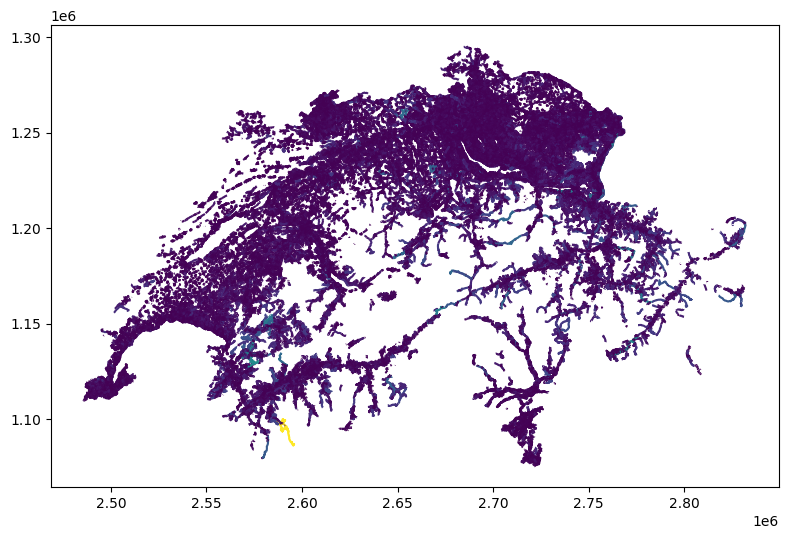

In [6]:
streets_geom.plot(column='LENGTH', figsize=(10, 6))

## make pretty (title no axes)

## Zoom into 

Zürich

#Easily find coordinates on https://map.geo.admin.ch/mobile.html?lang=de&topic=ech&bgLayer=ch.swisstopo.swissimage&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.astra.wanderland-sperrungen_umleitungen,ch.swisstopo.amtliches-strassenverzeichnis&layers_opacity=1,1,1,0.8,0.8,0.85&layers_visibility=false,false,false,false,false,true&layers_timestamp=18641231,,,,,&E=2683751.46&N=1248252.00&zoom=5.118447144074026


In [7]:
#bounds for Zurich
xmin =2680728
xmax =2685960
ymin =1245584
ymax =1249858

In [38]:
#only keep street inside bounds
streets_geo_zurich = streetnames_geom.cx[xmin:xmax, ymin:ymax]
streets_geo_zurich_s = streetnames_geom_s.cx[xmin:xmax, ymin:ymax]

In [9]:
streets_geo_zurich.STR_TERMS.unique()

array(['strasse', 'allee', 'weg', 'gasse', 'quai', nan, 'steg',
       'promenade', 'piazza', 'platz'], dtype=object)

In [10]:
streets_geo_zurich_s.classif.unique()

array(['Berg', 'Andere', 'Natur', 'Person', 'Siedlung', 'Gewässer',
       'Lebewesen', 'Religion', 'Beruf', 'Ortschaft'], dtype=object)

In [19]:
streets_geo_zurich_s.sex.unique()

array([nan, 'weiblich', 'männlich'], dtype=object)

Define colors. https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3 might help.

In [11]:
colors = {
    'strasse': '#a6cee3',
    'weg': '#b2df8a',
    'gasse': '#e6ab02',
    'quai': '#386cb0',
    'platz': '#f0027f',
    'piazza': '#e41a1c',
    'allee': '#984ea3',
    'steg': '#4daf4a',
    'promenade': '#fe9929',
    'other': '#999999'
}

In [12]:
colors_s = {
    'Ortschaft': '#e41a1c',
    'Natur': '#4daf4a',
    'Gewässer': '#1f78b4',
    'Lebewesen': '#984ea3',
    'Siedlung': '#ff7f00',
    'Person': '#fec44f',
    'Berg': '#a65628',
    'Religion': '#f781bf',
    'Beruf': '#41b6c4',
    'Andere' : '#d9d9d9'
}

In [40]:
colors_sex = {
    'weiblich': '#984ea3',
    'männlich': '#4daf4a',
    'no_value' : '#d9d9d9'
}

In [39]:
warnings.filterwarnings("ignore")

#Replace nan with other
streets_geo_zurich['STR_TERMS'] = streets_geo_zurich['STR_TERMS'].fillna('other')
streets_geo_zurich_s['sex'] = streets_geo_zurich_s['sex'].fillna('no_value')

Source for plot from https://github.com/theptyza/map_street_designations

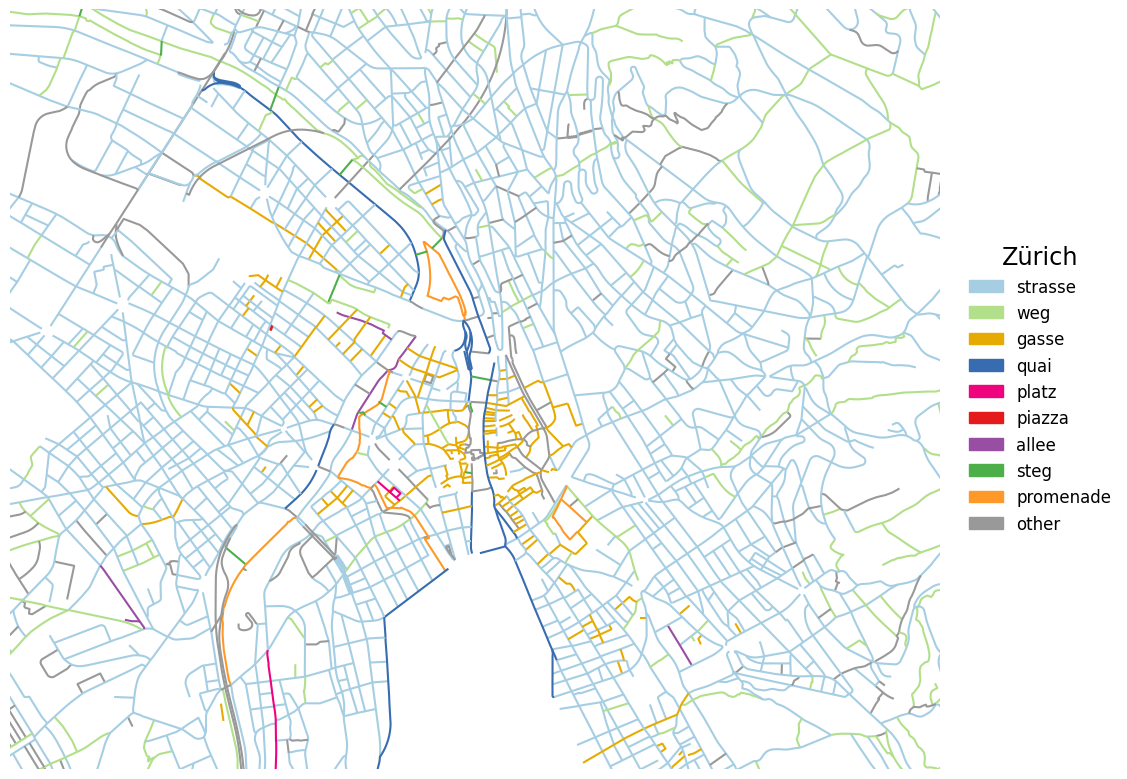

In [16]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_zurich.plot(ax=ax, 
                        color=[colors[d] for d in streets_geo_zurich.STR_TERMS])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors[k],
                    label=k) for k in colors],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Zürich',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.2, 0.5))

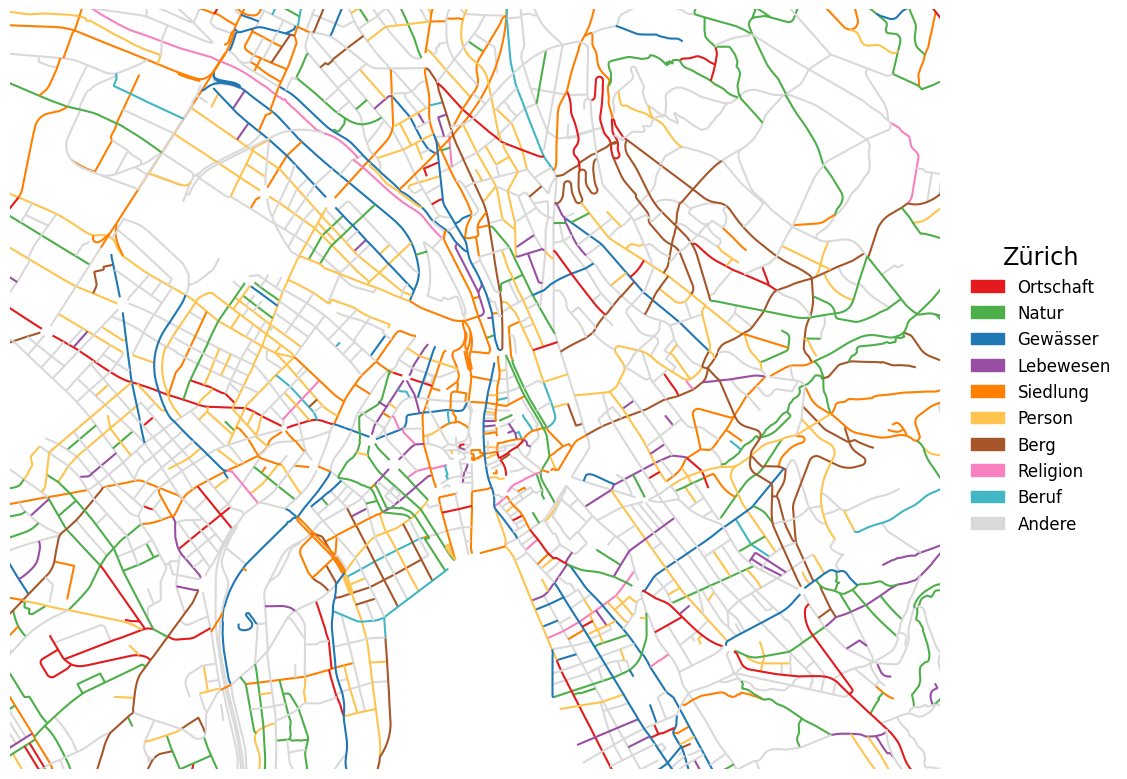

In [17]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_zurich_s.plot(ax=ax, 
                        color=[colors_s[d] for d in streets_geo_zurich_s.classif])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors_s[k],
                    label=k) for k in colors_s],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Zürich',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.2, 0.5))

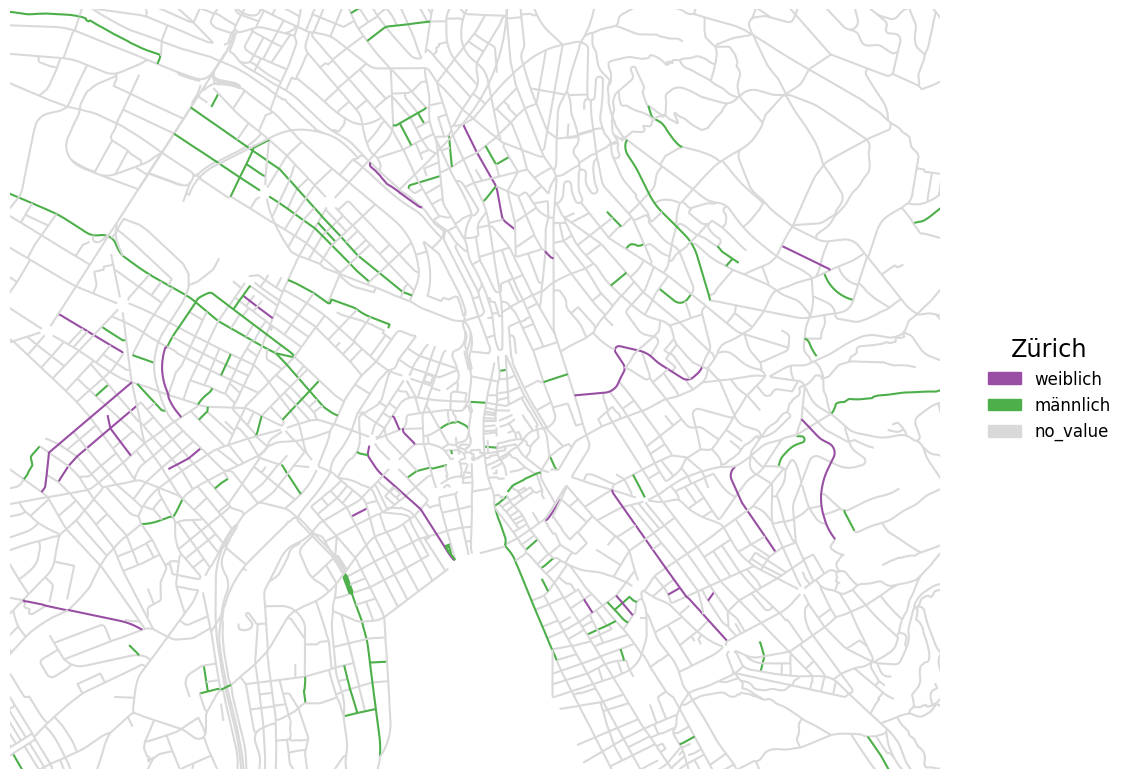

In [41]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_zurich_s.plot(ax=ax, 
                        color=[colors_sex[d] for d in streets_geo_zurich_s.sex])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors_sex[k],
                    label=k) for k in colors_sex],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Zürich',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.2, 0.5))

Genève

In [62]:
#bounds for Geneva
xmin =2497496
xmax =2503150
ymin =1116328
ymax =1119510

In [63]:
#only keep street inside bounds
streets_geo_geneva = streetnames_geom.cx[xmin:xmax, ymin:ymax]
streets_geo_geneva_s = streetnames_geom_s.cx[xmin:xmax, ymin:ymax]

In [64]:
streets_geo_geneva.STR_TERMS.unique()

array([nan, 'chemin', 'avenue', 'route', 'rue', 'quai', 'passage',
       'boulevard', 'ruelle', 'promenade', 'allee', 'sentier', 'gasse',
       'place'], dtype=object)

In [65]:
streets_geo_geneva_s.classif.unique()

array(['Siedlung', 'Andere', 'Natur', 'Lebewesen', 'Ortschaft', 'Person',
       'Berg', 'Beruf', 'Religion', 'Gewässer'], dtype=object)

In [66]:
streets_geo_geneva_s.sex.unique()

array([nan, 'féminin', 'masculin'], dtype=object)

In [67]:
colors_sex = {
    'féminin': '#984ea3',
    'masculin': '#4daf4a',
    'no_value' : '#d9d9d9'
}

In [68]:
colors = {
    'chemin': '#cab2d6',
    'avenue': '#ffed6f',
    'allee': '#41b6c4',
    'route': '#fb9a99',
    'rue': '#d9d9d9',
    'quai': '#1f78b4',
    'passage': '#e41a1c',
    'boulevard': '#6a3d9a',
    'ruelle': '#d9d9d9',
    'promenade': '#ff7f00',
    'sentier': '#33a02c',
    'gasse': '#999999',
    'place': '#4cb580',
    'other': '#999999'
}

In [69]:
warnings.filterwarnings("ignore")

#Replace nan with other
streets_geo_geneva['STR_TERMS'] = streets_geo_geneva['STR_TERMS'].fillna('other')
streets_geo_geneva_s['sex'] = streets_geo_geneva_s['sex'].fillna('no_value')

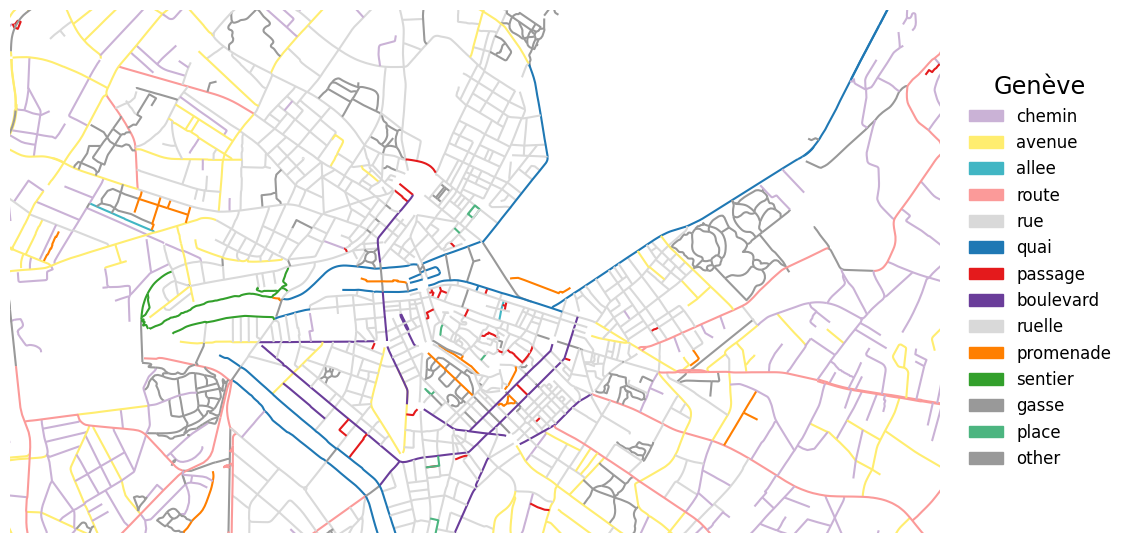

In [70]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_geneva.plot(ax=ax, 
                        color=[colors[d] for d in streets_geo_geneva.STR_TERMS])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors[k],
                    label=k) for k in colors],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Genève',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.2, 0.5))

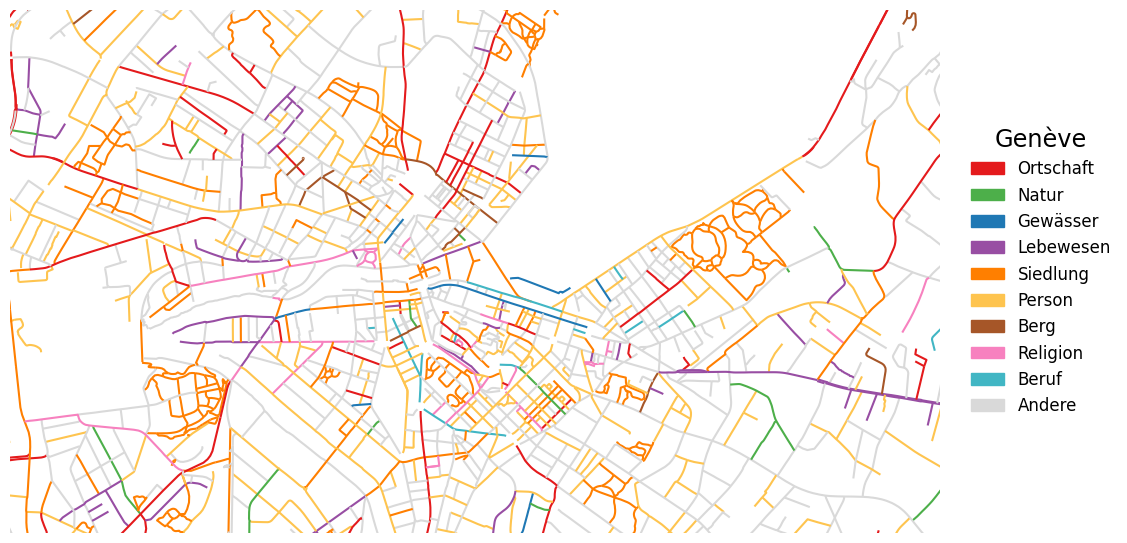

In [71]:
f, ax = plt.subplots(1, figsize=(12,12))
    
    
streets_geo_geneva_s.plot(ax=ax, 
                        color=[colors_s[d] for d in streets_geo_geneva_s.classif])

ax.set_ylim((ymin, ymax))
ax.set_xlim((xmin, xmax))
plt.axis('off')

plt.legend(handles=[mpatches.Patch(color=colors_s[k],
                    label=k) for k in colors_s],
               loc='center right',
               fontsize='large',
               edgecolor='none',
               title='Genève',
               title_fontsize='xx-large',
               bbox_to_anchor=(1.2, 0.5))